## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Nikhil Pradip More.

Task 1

To Predict the percentage of marks of the students based on the number of hours they studied

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

There is no null value in the Dataset so, we can now visualize our Data.

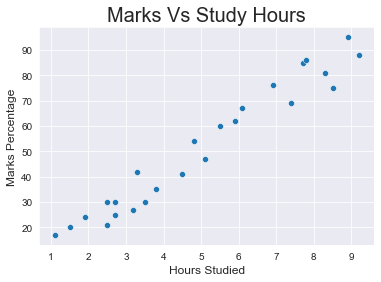

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

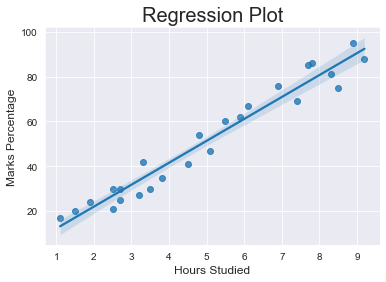

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

Training the Model
1) Splitting the Data

In [6]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2) Fitting the Data into the model

In [7]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


Predicting the Percentage of Marks

In [8]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the Predicted Marks with the Actual Marks

In [9]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visually Comparing the Predicted Marks with the Actual Marks

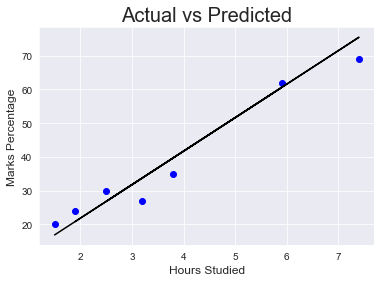

In [10]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [11]:
hours = 9.25
predicted = regression.coef_*hours+regression.intercept_
print("No of Hours = ",hours)
print("Predicted Score = ",predicted[0])
y_predict=regression.predict([[hours]])
print("Predicted Score if a student studied for 9.25 hours per day:",y_predict[0])

No of Hours =  9.25
Predicted Score =  93.89272889341655
Predicted Score if a student studied for 9.25 hours per day: 93.89272889341655


Model Evaluation

Our final step is to evaluate the performance of trained model. This step is to check how well is the model working with this dataset.

In [12]:
import sklearn.metrics as metrics

explained_variance=metrics.explained_variance_score(val_y,pred_y)
mean_absolute_error=metrics.mean_absolute_error(val_y,pred_y) 
mse=metrics.mean_squared_error(val_y,pred_y) 
mean_squared_log_error=metrics.mean_squared_log_error(val_y,pred_y)
median_absolute_error=metrics.median_absolute_error(val_y,pred_y)
r2=metrics.r2_score(val_y,pred_y)

print('Explained Variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Explained Variance:  0.9399
mean_squared_log_error:  0.0182
r2:  0.9368
MAE:  4.1309
MSE:  20.3329
RMSE:  4.5092
